In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load and preprocess the IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

# Create validation split
X_val, y_val = X_train[:10000], y_train[:10000]
X_train, y_train = X_train[10000:], y_train[10000:]

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (15000, 200)
Validation set shape: (10000, 200)
Test set shape: (25000, 200)


In [4]:
import tensorflow as tf

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(10000, 128, input_length=200),
        tf.keras.layers.Conv1D(64, 5, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create and compile model
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Training parameters
BATCH_SIZE = 128
EPOCHS = 10

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 29s 219ms/step - accuracy: 0.6276 - loss: 0.6239 - val_accuracy: 0.8702 - val_loss: 0.3165
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 25s 212ms/step - accuracy: 0.8967 - loss: 0.2742 - val_accuracy: 0.8802 - val_loss: 0.2923
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 204ms/step - accuracy: 0.9438 - loss: 0.1668 - val_accuracy: 0.8421 - val_loss: 0.3592
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 201ms/step - accuracy: 0.9453 - loss: 0.1520 - val_accuracy: 0.7730 - val_loss: 0.5224
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 201ms/step - accuracy: 0.9175 - loss: 0.2070 - val_accuracy: 0.8673 - val_loss: 0.3936
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 23s 198ms/step - accuracy: 0.9769 - loss: 0.0728 - val_accuracy: 0.8589 - val_loss: 0.4688
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 202ms/step - accuracy: 0.9903 - loss: 0.0343 - val_accuracy: 0.8501 - val_loss: 0.5765
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 203ms/step - accuracy: 0.9945 - loss: 0

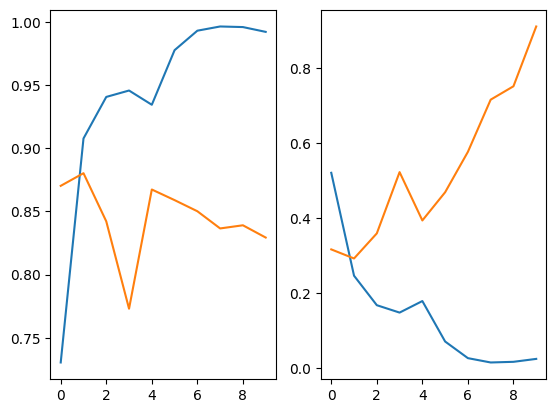

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.show()


Test Accuracy: 0.8123
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Predicted: Negative, Actual: Negative
Predicted: Positive, Actual: Positive
Predicted: Positive, Actual: Positive
Predicted: Negative, Actual: Negative
Predicted: Positive, Actual: Positive
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step


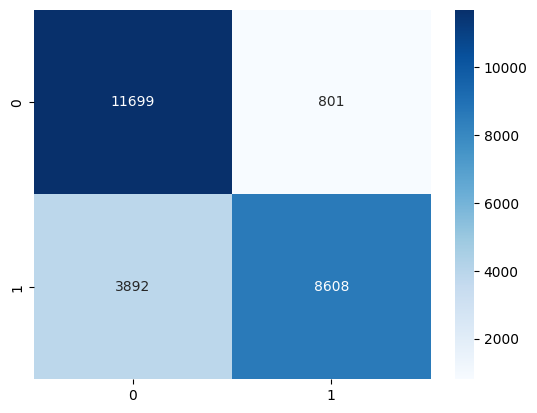

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate on test set
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test[:5])
for pred, actual in zip(predictions, y_test[:5]):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Predicted: {sentiment}, Actual: {'Positive' if actual == 1 else 'Negative'}")

# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [13]:
def predict_review(review_text):
    # Preprocess the review and make prediction
    sequence = [imdb.get_word_index().get(word, 0) for word in review_text.lower().split()]
    sequence = pad_sequences([sequence], maxlen=200)
    prediction = model.predict(sequence)[0][0]
    
    return ("Positive" if prediction > 0.5 else "Negative", prediction if prediction > 0.5 else 1 - prediction)

# Sample review
review = "Didn't like the movie, too much action"
sentiment, confidence = predict_review(review)
print(f"Review: {review}")
print(f"Prediction: {sentiment} (confidence: {confidence:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Review: Didn't like the movie, too much action
Prediction: Negative (confidence: 0.57)
